In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [81]:
# load the dataset and explore it
df = pd.read_csv('C:/Users/Elena/Desktop/tutorials/NLP projs/spam_classification/spam.tsv',sep='\t')
stats = df.describe()
rows = len(df)
class_freq = df['label'].value_counts()/ rows

# check for null values in the dataset
nan_val = df.isnull().sum()

In [82]:
# check the shape of data
ham.shape, spam.shape

((747, 4), (747, 4))

In [83]:
# class definition
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

# no of samples in spam data
samples = spam.shape[0]

# balance the classes
ham = ham.sample(samples)

# concatinate the data
data = ham.append(spam)


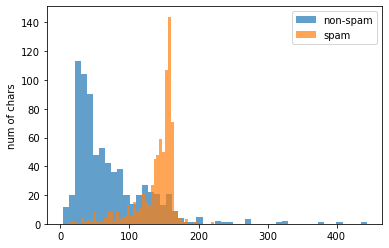

In [102]:
# Data visualization

# plot histogram of messages' length
plt.hist(data[data['label'] == 'ham']['length'],bins=50,alpha=0.7,label='non-spam')
plt.hist(data[data['label'] == 'spam']['length'],bins=50,alpha=0.7,label='spam')
plt.legend()

plt.ylabel("num of chars")
plt.show()

In [85]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(data['message'],data['label'],test_size=0.3,
                                                    random_state=0, shuffle=True)


# Building the models


In [91]:
# Random forest

from sklearn.pipeline import Pipeline
# there will be lot of repeated processes for training and testing the dataset separately,
# to avoid that we are using pipeline

from sklearn.feature_extraction.text import TfidfVectorizer
# we are importing TfidfVectorizer to utilize bag of words model in sklearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
classifier_RF = Pipeline([('tfidf', TfidfVectorizer()), ('classifier',RandomForestClassifier(n_estimators=100))])
classifier_RF.fit(X_train, y_train)

# SVM 
classifier_SVM = Pipeline([('tfidf', TfidfVectorizer()), ('classifier',SVC(C=100,gamma='auto'))])
classifier_SVM.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

# Predict the resutls

In [92]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [94]:
y_pred_RF = classifier_RF.predict(X_test)
y_pred_SVM = classifier_SVM.predict(X_test)

In [ ]:
accuracy_RF = accuracy_score(y_test, y_pred_RF)
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)

# confusiton matrix
confusion_RF = confusion_matrix(y_test, y_pred_RF)
confusion_SVM = confusion_matrix(y_test, y_pred_SVM)

report_RF = classification_report(y_test, y_pred_RF)
report_SVM = classification_report(y_test, y_pred_SVM)


# Testing our own messages 

In [118]:
test1 = 'Hello, You are learning atural Language Processing'
test2 = 'Hope you are doing good and learning new things !'
test3 = 'Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677'


for i in range(1,4):
    print(classifier_RF.predict([f"test{i}"]))
    print(classifier_SVM.predict([f"test{i}"]))
    
classifier_SVM.predict(['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677'])

['ham']
test1
['ham']
['ham']
test2
['ham']
['ham']
test3
['ham']


array(['spam'], dtype=object)